In [1]:
import numpy as np
import matplotlib.pyplot as plt

from keras.datasets import mnist

**Tensor** is a container for data — usually numerical data. So, it’s a container for numbers. Matrices are rank-2 tensors: tensors are a generalization of matrices to an arbitrary number of dimensions (note that in the context of tensors, a dimension is often called an axis)

**Scalars** (rank-0 tensors)

A tensor that contains only one number is called a scalar (or scalar tensor, or rank-0 tensor, or 0D tensor). In NumPy, a float32 or float64 number is a scalar tensor (or scalar array).

You can display the number of axes of a NumPy tensor via the ndim attribute; a scalar tensor has 0 axes (ndim == 0). The number of axes of a tensor is also called its rank. Here’s a NumPy scalar

In [2]:
x = np.array(12)
x

array(12)

In [3]:
x.ndim

0

**Vectors** (rank-1 tensors)

An array of numbers is called a vector, or rank-1 tensor, or 1D tensor. A rank-1 tensor is said to have exactly one axis. Following is a NumPy vector

In [4]:
x = np.array([12, 3, 6, 14, 7])
x

array([12,  3,  6, 14,  7])

In [5]:
x.ndim

1

**Matrices** (rank-2 tensors)

n array of vectors is a matrix, or rank-2 tensor, or 2D tensor. A matrix has two axes (often referred to rows and columns). You can visually interpret a matrix as a rectangular grid of numbers. This is a NumPy matrix

In [6]:
x = np.array([[5, 78, 2, 34, 0],
             [6, 79, 3, 5, 1],
             [7, 80, 4, 36, 2]])
x

array([[ 5, 78,  2, 34,  0],
       [ 6, 79,  3,  5,  1],
       [ 7, 80,  4, 36,  2]])

In [7]:
x.ndim

2

Rank-3 tensors and higher-rank tensors

If you pack such matrices in a new array, you obtain a rank-3 tensor (or 3D tensor), which you can visually interpret as a cube of numbers. Following is a NumPy rank-3 tensor

In [8]:
x = np.array([[[5, 78, 2, 34, 0],
                   [6, 79, 3, 35, 1],
                   [7, 80, 4, 36, 2]],
                  [[5, 78, 2, 34, 0],
                   [6, 79, 3, 35, 1],
                   [7, 80, 4, 36, 2]],
                  [[5, 78, 2, 34, 0],
                   [6, 79, 3, 35, 1],
                   [7, 80, 4, 36, 2]]])
x

array([[[ 5, 78,  2, 34,  0],
        [ 6, 79,  3, 35,  1],
        [ 7, 80,  4, 36,  2]],

       [[ 5, 78,  2, 34,  0],
        [ 6, 79,  3, 35,  1],
        [ 7, 80,  4, 36,  2]],

       [[ 5, 78,  2, 34,  0],
        [ 6, 79,  3, 35,  1],
        [ 7, 80,  4, 36,  2]]])

In [9]:
x.ndim

3

#### Key attributes

A tensor is defined by three key attributes:

**Number of axes (rank)** — For instance, a rank-3 tensor has three axes, and a matrix has two axes. This is also called the tensor’s ndim in Python libraries such as NumPy or TensorFlow.

**Shape** — This is a tuple of integers that describes how many dimensions the tensor has along each axis. For instance, the previous matrix example has shape (3, 5), and the rank-3 tensor example has shape (3, 3, 5). A vector has a shape with a single element, such as (5,), whereas a scalar has an empty shape, ().

**Data type** (usually called dtype in Python libraries) — This is the type of the data contained in the tensor; for instance, a tensor’s type could be float16, float32, float64, uint8, and so on. In TensorFlow, you are also likely to come across string tensors.

In [10]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [11]:
print(train_images.ndim)

3


In [12]:
print(train_images.shape)

(60000, 28, 28)


In [13]:
print(train_images.dtype)

uint8


So what we have here is a rank-3 tensor of 8-bit integers. More precisely, it’s an array of 60,000 matrices of 28 × 28 integers. Each such matrix is a grayscale image, with coefficients between 0 and 255

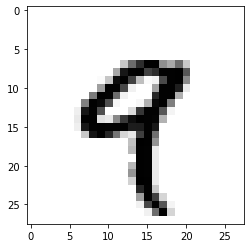

In [14]:
digit = train_images[4]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [15]:
train_labels[4]

9

#### Manipulating tensors in NumPy

The following example selects digits #10 to #100 (#100 isn’t included) and puts them in an array of shape (90, 28, 28)

In [16]:
my_slice = train_images[10:100]
print(my_slice.shape)

(90, 28, 28)


In [17]:
my_slice = train_images[:, 14:, 14:]
print(my_slice.shape)

(60000, 14, 14)


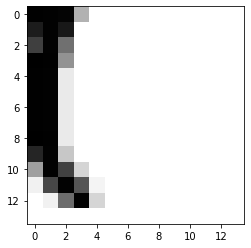

In [18]:
sliced_digit = my_slice[4]
plt.imshow(sliced_digit, cmap=plt.cm.binary)
plt.show()

### The notion of data batches

In general, the first axis (axis 0, because indexing starts at 0) in all data tensors you’ll come across in deep learning will be the samples axis (sometimes called the samples dimension). In the MNIST example, samples are images of digits.

In addition, deep-learning models don’t process an entire dataset at once; rather, they break the data into small batches. Concretely, here’s one batch of our MNIST digits, with batch size of 128.

When considering such a batch tensor, the first axis (axis 0) is called the batch axis or batch dimension. This is a term you’ll frequently encounter when using Keras and other deep-learning libraries.

In [19]:
batch = train_images[:128]

In [20]:
batch = train_images[128:256]   # same as: n = 2 batch = train_images[128*n:128*(n+1)]

In [21]:
n = 3
batch = train_images[128*n:128*(n+1)]

### Real-world examples of data tensors

The data you’ll manipulate will almost always fall into one of the following categories:

**Vector data** — rank-2 tensors of shape (samples, features)

**Timeseries data or sequence data** — rank-3 tensors of shape (samples, timesteps, features)

**Images** — rank-4 tensors of shape (samples, height, width, channels) or (samples, channels, height, width)

**Video** — rank-5 tensors of shape (samples, frames, height, width, channels) or (samples, frames, channels, height, width)

####  Vector data

This is one of the most common cases. In such a dataset, each single data point can be encoded as a vector, and thus a batch of data will be encoded as a rank-2 tensor (that is, an array of vectors), where the first axis is the samples axis and the second axis is the features axis.

Let’s take a look at two examples:

An actuarial dataset of people, where we consider each person’s age, ZIP code, and income. Each person can be characterized as a vector of 3 values, and thus an entire dataset of 100,000 people can be stored in a rank-2 tensor of shape (100000, 3).

A dataset of text documents, where we represent each document by the counts of how many times each word appears in it (out of a dictionary of 20,000 common words). Each document can be encoded as a vector of 20,000 values (one count per word in the dictionary), and thus an entire dataset of 500 documents can be stored in a tensor of shape (500, 20000).

#### Timeseries data or sequence data

Whenever time matters in your data (or the notion of sequence order), it makes sense to store it in a rank-3 tensor with an explicit time axis. Each sample can be encoded as a sequence of vectors (a rank-2 tensor), and thus a batch of data will be encoded as a rank-3 tensor.

The time axis is always the second axis (axis of index 1), by convention. Let’s look at a few examples:

A dataset of stock prices. Every minute, we store the current price of the stock, the highest price in the past minute, and the lowest price in the past minute. Thus every minute is encoded as a 3D vector, an entire day of trading is encoded as a matrix of shape (390, 3) (there are 390 minutes in a trading day), and 250 days' worth of data can be stored in a rank-3 tensor of shape (250, 390, 3). Here, each sample would be one day’s worth of data.

A dataset of tweets, where we encode each tweet as a sequence of 280 characters out of an alphabet of 128 unique characters. In this setting, each character can be encoded as a binary vector of size 128 (an all-zeros vector except for a 1 entry at the index corresponding to the character). Then each tweet can be encoded as a rank-2 tensor of shape (280, 128), and a dataset of 1 million tweets can be stored in a tensor of shape (1000000, 280, 128)

#### Image data

Images typically have three dimensions: height, width, and color depth. Although grayscale images (like our MNIST digits) have only a single color channel and could thus be stored in rank-2 tensors, by convention image tensors are always rank-3, with a one-dimensional color channel for grayscale images. A batch of 128 grayscale images of size 256 × 256 could thus be stored in a tensor of shape (128, 256, 256, 1), and a batch of 128 color images could be stored in a tensor of shape (128, 256, 256, 3).

There are two conventions for shapes of images tensors: the channels-last convention (which is standard in TensorFlow) and the channels-first convention.

The channels-last convention places the color-depth axis at the end: (samples, height, width, color_depth). Meanwhile, the channels-first convention places the color depth axis right after the batch axis: (samples, color_depth, height, width). With the channels-last convention, the previous examples would become (128, 1, 256, 256) and (128, 3, 256, 256). The Keras API provides support for both formats.

#### Video data

Video data is one of the few types of real-world data for which you’ll need rank-5 tensors. A video can be understood as a sequence of frames, each frame being a color image. Because each frame can be stored in a rank-3 tensor (height, width, color_depth), a sequence of frames can be stored in a rank-4 tensor (frames, height, width, color_depth), and thus a batch of different videos can be stored in a rank-5 tensor of shape (samples, frames, height, width, color_depth).

For instance, a 60-second, 144 × 256 YouTube video clip sampled at 4 frames per second would have 240 frames. A batch of four such video clips would be stored in a tensor of shape (4, 240, 144, 256, 3). That’s a total of 106,168,320 values! If the dtype of the tensor was float32, then each value would be stored in 32 bits, so the tensor would represent 405 MB. Heavy! Videos you encounter in real life are much lighter, because they aren’t stored in float32, and they’re typically compressed by a large factor (such as in the MPEG format).